# Cat VS Dogs

# Intro

In this notebook, I will try to classify whether images contain either a dog or a cat, by using Ensemble Learning .<br>
The training archive contains 25,000 images of dogs and cats.<br>


# Loading Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread
#import seaborn as sns
#from sklearn.model_selection import train_test_split #to perform the splitting
import os
#import tensorflow as tf
import cv2# library of Python bindings designed to solve computer vision problems.

# <b>Loading dataset</b>

First of all, I opened the train folder and saw that the folder has pictures of both cats and dogs.<br>
Pictures of dogs are kept in the name: "dog.number", and pictures of cats are kept in the name: "cat.number".<br>
The following code will create a list of all the file names in the folder:

In [2]:
TRAIN_DIR = 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/'
#TEST_DIR = '../working/test/test/'

trainCatsAndDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]
#trainDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]

#test_images_filepaths = [TEST_DIR + last_file_name for last_file_name in os.listdir(TEST_DIR)]

#print("Done")

In [3]:
trainCatsAndDogs_images_filepaths

['E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.0.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.1.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.100.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.1000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10001.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/

After I created a list of all the file names, I want to separate the files contains 'dog' in their name to one list, <br>
and the files contains 'cat' in their name to another list.

In [4]:
#Define two lists of dogs and cats, and check if the file name contain 'dog' or 'cat'
train_dogs_filepaths = [TRAIN_DIR+ dog_file_name for dog_file_name in os.listdir(TRAIN_DIR) if 'dog' in dog_file_name]
train_cats_filepaths = [TRAIN_DIR+ cat_file_name for cat_file_name in os.listdir(TRAIN_DIR) if 'cat' in cat_file_name]


In [5]:
train_cats_filepaths

['E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.0.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.1.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.100.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.1000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/cat.10001.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/

In [6]:
train_dogs_filepaths

['E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.0.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.1.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.10.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.100.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.1000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.10000.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/Final Project Semester 2/Data-Visualization-Final-Project/Data/Cats vs Dogs/train/dog.10001.jpg',
 'E:/My_Files/Projects/Jupyter_Notebooks/

## Explain about method's parameters<b>

**cv2.imread(path, flag)**:<br>
    
method loads an image from the specified file and read it into a numpy array.<br> 
If the image cannot be read (because of missing file, improper permissions,unsupported or invalid format) then this method returns an empty matrix.<br> 
    
**path**-A string representing the path of the image to be read.<br>
**flag**-It specifies the way in which image should be read.<br>
    It’s default value is cv2.IMREAD_COLOR-to load a color image and cv2.IMREAD_GRAYSCALE to load grey scale image. <br>
    
**plt.imshow(img_array)**:<br>
    
method is used to display an image in a window. The window automatically fits to the image size.<br>
    
**img_array**-array of pixels (as we got from last method).
    

In [7]:
#Lets see how the first picture of dog look like 
test_img_file_path =train_dogs_filepaths[0] #the first element in train_dogs_filepaths array
#Now I will use cv2.imread() method- to loads an image from the specified file. 
img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
img_array #Lets see how the numpy array of the image look like



array([[[124, 113, 115],
        [127, 116, 118],
        [128, 117, 119],
        ...,
        [139, 131, 131],
        [139, 131, 131],
        [139, 131, 131]],

       [[125, 114, 116],
        [127, 116, 118],
        [128, 117, 119],
        ...,
        [141, 133, 133],
        [141, 133, 133],
        [141, 133, 133]],

       [[126, 115, 117],
        [128, 117, 119],
        [129, 118, 120],
        ...,
        [143, 135, 135],
        [143, 135, 135],
        [143, 135, 135]],

       ...,

       [[ 77,  73,  68],
        [ 81,  77,  72],
        [ 83,  79,  74],
        ...,
        [ 85,  83,  73],
        [ 84,  82,  72],
        [ 83,  81,  71]],

       [[ 75,  71,  66],
        [ 77,  73,  68],
        [ 77,  73,  68],
        ...,
        [ 77,  75,  65],
        [ 77,  75,  65],
        [ 78,  76,  66]],

       [[ 74,  70,  65],
        [ 75,  71,  66],
        [ 74,  70,  65],
        ...,
        [ 76,  74,  64],
        [ 76,  74,  64],
        [ 76,  74,  64]]

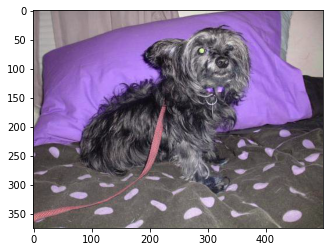

In [8]:
plt.imshow(img_array)#show the image
plt.show() 

In [9]:
#We can see the dimension of the image 
print(img_array.shape)

(375, 499, 3)


According to numpy documentation, the resulting array we got from .shape method will always have this order:(height, width).<br>
For example, referring to the example above- the image is 499 pixel wide, and 375 pixel high.<br>
Each pixel contains 3 bytes (representing the red, green and blue values of the pixel color).<br>
As we learned during current semester, one way to dimensionality reduction is to change the image to grayscale image.<br>
Lets show it:
   

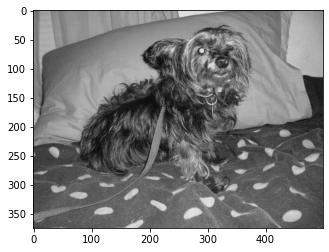

In [10]:
img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array_gray, cmap = "gray")
plt.show()


In [11]:
#Lets see the dimension of the image
print(img_array_gray.shape)

(375, 499)


In [12]:
#Lets see the array itself
#each cell in the array below, represent a roe in the image, and each number in the cell represent a specific pixel in the image
print(img_array_gray)

[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


In [13]:
#Now, I want to represent each image as one row of pixels, by method: .ravel()
print(img_array_gray.ravel())

[115 118 119 ...  71  71  71]


## Resize<b>

All images in the train file , should be at the same size Lets see the size of all images:

In [14]:
#Check the size for Dogs image
Dogs_imSize=[]
i=0
for file in train_dogs_filepaths:
    test_img_file_path =train_dogs_filepaths[i]
    img_array = cv2.imread(test_img_file_path)
    Dogs_imSize.append(img_array.shape)
    i=i+1


In [15]:
print(Dogs_imSize)
print(len(Dogs_imSize))

[(375, 499, 3), (499, 327, 3), (292, 269, 3), (397, 500, 3), (375, 499, 3), (412, 263, 3), (151, 109, 3), (375, 499, 3), (360, 431, 3), (375, 499, 3), (366, 224, 3), (339, 499, 3), (499, 429, 3), (374, 500, 3), (332, 500, 3), (500, 347, 3), (316, 315, 3), (415, 449, 3), (402, 500, 3), (374, 500, 3), (490, 399, 3), (356, 478, 3), (500, 347, 3), (374, 500, 3), (375, 499, 3), (374, 500, 3), (199, 200, 3), (255, 335, 3), (473, 499, 3), (374, 500, 3), (363, 431, 3), (299, 400, 3), (375, 499, 3), (281, 500, 3), (375, 499, 3), (374, 500, 3), (326, 349, 3), (166, 220, 3), (250, 249, 3), (374, 500, 3), (374, 500, 3), (396, 490, 3), (284, 500, 3), (447, 499, 3), (374, 500, 3), (500, 394, 3), (476, 499, 3), (375, 499, 3), (333, 235, 3), (499, 319, 3), (375, 499, 3), (455, 500, 3), (239, 320, 3), (329, 499, 3), (374, 500, 3), (333, 499, 3), (182, 181, 3), (499, 436, 3), (500, 406, 3), (355, 500, 3), (351, 350, 3), (374, 499, 3), (499, 363, 3), (331, 500, 3), (375, 499, 3), (374, 500, 3), (499, 264

In [16]:
#Check the size for Cats image
Cats_imSize=[]
i=0
for file in train_cats_filepaths:
    test_img_file_path =train_cats_filepaths[i]
    img_array = cv2.imread(test_img_file_path)
    Cats_imSize.append(img_array.shape)
    i=i+1


In [17]:
print(Cats_imSize)
print(len(Cats_imSize))

[(374, 500, 3), (280, 300, 3), (499, 489, 3), (499, 403, 3), (149, 150, 3), (359, 431, 3), (374, 500, 3), (471, 499, 3), (375, 499, 3), (239, 320, 3), (177, 319, 3), (320, 460, 3), (300, 219, 3), (374, 500, 3), (500, 472, 3), (499, 336, 3), (386, 499, 3), (448, 357, 3), (166, 250, 3), (374, 500, 3), (500, 372, 3), (339, 500, 3), (198, 179, 3), (280, 500, 3), (454, 499, 3), (301, 246, 3), (407, 379, 3), (423, 320, 3), (417, 423, 3), (448, 500, 3), (336, 349, 3), (431, 325, 3), (251, 153, 3), (491, 400, 3), (332, 500, 3), (134, 180, 3), (500, 385, 3), (269, 259, 3), (462, 500, 3), (374, 500, 3), (120, 159, 3), (374, 500, 3), (390, 500, 3), (391, 356, 3), (263, 300, 3), (276, 434, 3), (300, 299, 3), (500, 360, 3), (375, 499, 3), (375, 499, 3), (440, 500, 3), (480, 319, 3), (406, 500, 3), (273, 378, 3), (374, 500, 3), (336, 373, 3), (500, 451, 3), (384, 385, 3), (422, 231, 3), (333, 500, 3), (469, 450, 3), (450, 432, 3), (500, 345, 3), (400, 299, 3), (390, 499, 3), (403, 499, 3), (299, 248

As we can see, there is no uniform size for all images, therefore I will set global image size for all:

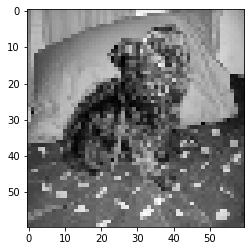

In [18]:
ROW_DIMENSION = 60
COLUMN_DIMENSION = 60
CHANNELS = 1 #For greyscale images put it to 1; put it to 3 if you want color image data

new_array = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION)) #A squarish compression on it's width will take place
plt.imshow(new_array,cmap = 'gray')
plt.show()

with dimension of 60 in row and column, it is not possible to identify even for human which animal appears in the image above,<br>
so I will try another values:

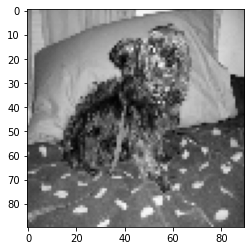

In [19]:
ROW_DIMENSION = 90
COLUMN_DIMENSION = 90
CHANNELS = 1 #For greyscale images put it to 1; put it to 3 if you want color image data

new_array = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION)) #A squarish compression on it's width will take place
plt.imshow(new_array,cmap = 'gray')
plt.show()

# Create df with the pixels of every image in a row

I tried different values as: 70,80,100,110,120,125.<br>
The value I could recognize that there was a dog in the image was: 90.<br>
Now, I will create df that show each image as row of pixels as I already done before for the image above.<br>
First of all, because I chose size 90 * 90, the size of the df should be 8100-1=8099

## Create DF for Dogs

In [20]:
dfDogs=pd.DataFrame(index=np.arange(12500), columns=np.arange(8100))
dfDogs


,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#df for dogs
i=0
for i in range (0, len(train_dogs_filepaths)):
    test_img_file_path =train_dogs_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    #img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
    img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)
    img_array_gray = cv2.resize(img_array_gray,(90,90))
    img_array_gray=img_array_gray.ravel()
    dfDogs.loc[i]=img_array_gray
#I will define the whole column 'DogORCat' as 1 (representing that s dog is appear in the image, as I have already written above)     
dfDogs['DogORCat']=1
dfDogs

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,DogORCat
0,119,112,161,160,159,134,130,138,123,131,...,74,78,73,78,81,74,73,80,78,1
1,138,126,127,121,93,47,84,106,80,121,...,245,249,252,247,245,241,240,237,236,1
2,117,108,93,95,114,120,117,121,126,124,...,78,95,96,94,95,93,95,94,94,1
3,185,188,187,181,180,182,182,186,185,181,...,70,60,84,82,66,55,65,70,70,1
4,16,7,9,12,43,57,43,98,42,79,...,105,110,111,104,124,117,121,117,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,143,143,145,147,147,149,148,149,150,...,164,165,167,166,167,168,168,168,169,1
12496,114,77,120,78,94,100,65,94,84,70,...,99,94,82,94,93,90,81,92,76,1
12497,39,37,58,54,61,58,58,53,44,44,...,117,146,121,126,118,186,148,114,170,1
12498,254,250,242,230,216,198,155,120,72,61,...,114,108,98,104,102,111,111,113,120,1


## Create DF for Cats

In [22]:
dfCats=pd.DataFrame(index=np.arange(12500), columns=np.arange(8100))
dfCats

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#df for cats
i=0
for i in range (0, len(train_cats_filepaths)):
    test_img_file_path =train_cats_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    #img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
    img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)
    img_array_gray = cv2.resize(img_array_gray,(90,90))
    img_array_gray=img_array_gray.ravel()
    dfCats.loc[i]=img_array_gray
#I will define the whole column 'DogORCat' as 0 (representing that cat is appear in the image, as I have already written above)         
dfCats['DogORCat']=0
dfCats

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,DogORCat
0,168,173,179,183,186,190,192,196,198,201,...,3,3,3,2,2,2,2,2,2,0
1,43,44,60,33,41,38,45,39,58,37,...,44,49,54,58,50,78,70,32,35,0
2,40,32,45,48,52,57,54,54,59,48,...,154,165,144,132,138,153,166,171,153,0
3,221,224,223,230,229,225,231,230,226,228,...,230,208,205,204,209,221,219,211,213,0
4,115,119,123,83,77,119,137,131,182,125,...,92,96,95,93,110,106,88,98,83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,22,21,21,21,20,21,20,20,20,...,79,70,79,73,77,76,85,68,76,0
12496,101,96,93,93,92,91,95,98,99,93,...,104,104,103,103,102,101,100,103,100,0
12497,96,97,97,96,106,96,94,94,100,114,...,253,254,254,254,254,254,254,254,254,0
12498,57,53,49,127,147,157,158,159,160,161,...,197,197,204,215,224,231,223,218,216,0


## Merge both DF into one

In [24]:
#Merge both df into one, with concat method as we learned previous semester

frames = [dfDogs, dfCats]

dfCatsAndDogs = pd.concat(frames)
dfCatsAndDogs=dfCatsAndDogs.reset_index()
dfCatsAndDogs.drop(['index'],axis='columns', inplace=True)
dfCatsAndDogs

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,DogORCat
0,119,112,161,160,159,134,130,138,123,131,...,74,78,73,78,81,74,73,80,78,1
1,138,126,127,121,93,47,84,106,80,121,...,245,249,252,247,245,241,240,237,236,1
2,117,108,93,95,114,120,117,121,126,124,...,78,95,96,94,95,93,95,94,94,1
3,185,188,187,181,180,182,182,186,185,181,...,70,60,84,82,66,55,65,70,70,1
4,16,7,9,12,43,57,43,98,42,79,...,105,110,111,104,124,117,121,117,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24,22,21,21,21,20,21,20,20,20,...,79,70,79,73,77,76,85,68,76,0
24996,101,96,93,93,92,91,95,98,99,93,...,104,104,103,103,102,101,100,103,100,0
24997,96,97,97,96,106,96,94,94,100,114,...,253,254,254,254,254,254,254,254,254,0
24998,57,53,49,127,147,157,158,159,160,161,...,197,197,204,215,224,231,223,218,216,0


### Plot the distribution of the data

Althoght we know there are 12500 images for every label, let's plot it:

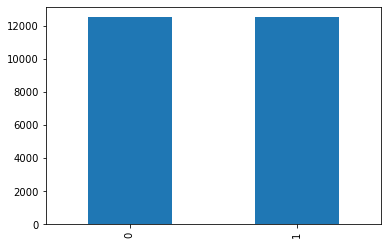

In [25]:
dfCatsAndDogs['DogORCat'].value_counts().plot.bar()
plt.show()

# Data cleaning
## <b>know and organize the dataset</b>

In [26]:
# check the shape of the DataFrame (rows, columns)
dfCatsAndDogs.shape #8101 colums because we add the DogORCat column

(25000, 8101)

**Explanation about the columns and rows:**<br>

**What are the features?**<br>
25000 rows- every row represent list of pixels in the image.<br>
The first row of pixels in the image is the first 90 cells in a row in the df, the next 90 cells are the seconed row of pixels in the image, etc. .<br>
8100 columns of pixels- After I set a uniform size for all the images, the size is 90*90, therefore there are 8100 rows.


**What is the response?**<br>
DogORCat-Is it a Dog (1) or a Cat (-1)<br>

## <b>Duplicate Values</b>

If there are duplicate values- means that specific image appear few times, therefore I would like to delete them.


In [27]:
dfCatsAndDogs=dfCatsAndDogs.drop_duplicates()#By default, it removes duplicate rows based on all columns.

dfCatsAndDogs.shape

(24994, 8101)

**Conclusion**

In [28]:
#There were 25000 rows and now there are 24994 means we deleted 25000-24994=6 duplicate rows, we will write it at precentage:
print ("Percent of duplicate images I deleted:", (6*100)/25000,"%")

Percent of duplicate images I deleted: 0.024 %


## <b>Invalid images</b>

If there are invalid images such as black images or white images etc - therefore there will be same pixel value in all the row of the specific image, so I want to delete it.<br>
In addition, If there are images with missing pixels, I would like to delete it too.<br>
Examples for invalid images:

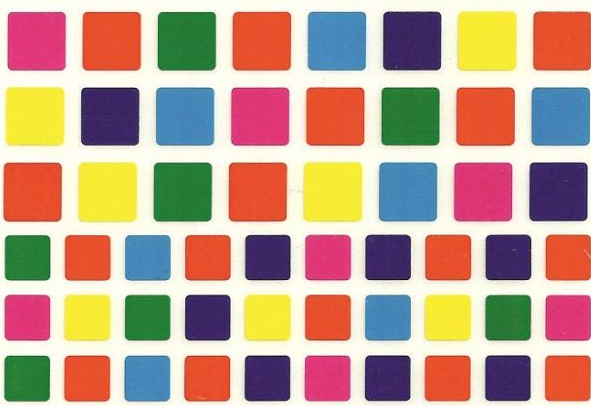

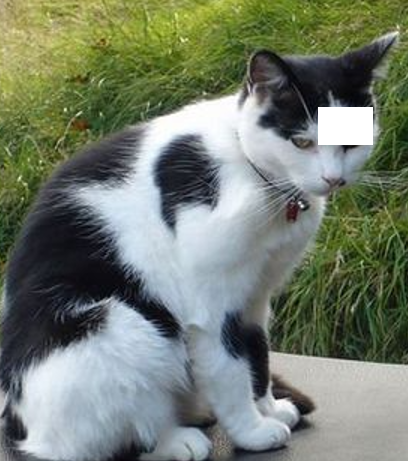

In [29]:
dfCatsAndDogs=dfCatsAndDogs[dfCatsAndDogs.nunique(1)>1]
dfCatsAndDogs.shape

(24994, 8101)

**Conclusion**<br>
The shape is the same, so we will conclude that there are no invalid images.<br>

## <b>Nan Values</b>
Another thing I would like to check is if there are any images that are missing pixels.<br>
This will be expressed in df by having Nan values.<br>
Lets check if there are Nan values.

In [30]:
#check for null values
print("There are",dfCatsAndDogs.isnull().sum().sum(),"null values in df.")

There are 0 null values in df.


# <b>First Split </b>

Because we do not have two different parts of train and test- we will split the data. 

In [31]:
from sklearn.model_selection import train_test_split #to perform the splitting

In [32]:
#split the data into labels and features 
y=dfCatsAndDogs.DogORCat #DogORCat is the label we want to predict
x=dfCatsAndDogs.drop('DogORCat',axis=1)#use drop function to take all other data in x

In [33]:
x_train_ForAll,x_test_Final,y_train_ForAll,y_test_Final=train_test_split(x,y,test_size=0.3,random_state=0)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

Lets check the size of x_train_ForAll:

In [34]:
x_train_ForAll.shape

(17495, 8100)

# <b>Secondary Split to train set and test set</b>

In [35]:
#split the data into labels and features 
y=y_train_ForAll
x=x_train_ForAll

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

Lets check the size of x_train:

In [37]:
x_train.shape

(12246, 8100)

# <b>Dimensionality Reduction </b>

# PCA -Principal Component Analysis

PCA is the most popular dimensionality reduction algorithm.<br>
First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

# Data Scaling

By using PCA I will try to reduce those dimensions into smaller number of dimensions, which will be creating a new vector space. <br>
First thing I want to do is **Min-Max scaling**.<br>
Min-max scaling (normalization) is way to get all attributes to have the same scale values, by the way they are shifted and rescaled so that they end up ranging from 0 to 1.<br>
We do this by subtracting the min value and dividing by the max minus the min.<br>
Scikit-Learn provides a transformer called MinMaxScaler for this.<br>
It has a feature_range hyperparameter that let change the range if, for some reason, you don’t want 0–1.<br>

The main reason for doing Min-Max scaling, is that as it is possible to see the difference between the values of all coulumns will be very high.<br>
As I read in web, for a grayscale images, the pixel value is a single number that represents the brightness of the pixel.<br>
The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a **range of possible values from 0 to 255.**<br>
Typically zero is taken to be black, and 255 is taken to be white.<br>
**Therefore, the range of the columns (beside Dog\Cat column) is 0-255.**<br>
It is also possible to see it by the methods:<br>
dfCatsAndDogs.max() <br>
dfCatsAndDogs.min() 


## Importing additional libraries

In [38]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
#We will scale the x_train set
scaler = MinMaxScaler()
scaler.fit(x_train)#this is the train part from the secondary split

scaled_data=scaler.transform(x_train)# We get array 
x_train_scaled= pd.DataFrame(scaled_data)#turn into df
x_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.462745,0.462745,0.458824,0.423529,0.415686,0.443137,0.470588,0.462745,0.462745,0.462745,...,0.894118,0.909804,0.901961,0.847059,0.874510,0.968627,0.988235,0.949020,0.854902,0.878431
1,0.768627,0.772549,0.745098,0.756863,0.792157,0.764706,0.756863,0.760784,0.756863,0.760784,...,0.741176,0.725490,0.709804,0.705882,0.694118,0.694118,0.717647,0.694118,0.658824,0.623529
2,0.988235,0.988235,0.988235,0.968627,0.831373,0.545098,0.709804,0.984314,0.984314,0.976471,...,0.956863,0.643137,0.447059,0.525490,0.474510,0.486275,0.615686,0.662745,0.533333,0.564706
3,0.603922,0.647059,0.490196,0.462745,0.447059,0.490196,0.501961,0.537255,0.592157,0.635294,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078
4,0.392157,0.384314,0.384314,0.392157,0.400000,0.400000,0.400000,0.388235,0.403922,0.400000,...,0.349020,0.333333,0.356863,0.368627,0.321569,0.274510,0.270588,0.290196,0.309804,0.301961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12241,0.439216,0.207843,0.094118,0.105882,0.141176,0.149020,0.223529,0.415686,0.180392,0.203922,...,0.423529,0.407843,0.407843,0.392157,0.384314,0.372549,0.235294,0.145098,0.141176,0.133333
12242,0.058824,0.105882,0.090196,0.094118,0.047059,0.062745,0.031373,0.019608,0.023529,0.047059,...,0.007843,0.019608,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
12243,0.262745,0.301961,0.290196,0.325490,0.403922,0.525490,0.541176,0.658824,0.745098,0.705882,...,0.411765,0.431373,0.388235,0.396078,0.439216,0.419608,0.431373,0.431373,0.403922,0.435294
12244,0.286275,0.282353,0.286275,0.258824,0.250980,0.262745,0.282353,0.274510,0.298039,0.333333,...,0.384314,0.415686,0.443137,0.427451,0.423529,0.427451,0.427451,0.407843,0.403922,0.431373


In [40]:
#We will scale the x_test set
scaled_data_test=scaler.transform(x_test)# We get array 
x_test_scaled= pd.DataFrame(scaled_data_test)#turn into df
x_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,0.090196,0.094118,0.090196,0.094118,0.101961,0.101961,0.125490,0.113725,0.090196,0.101961,...,0.870588,0.835294,0.807843,0.850980,0.854902,0.874510,0.866667,0.866667,0.874510,0.878431
1,0.572549,0.643137,0.337255,0.631373,0.627451,0.647059,0.650980,0.600000,0.603922,0.509804,...,0.729412,0.835294,0.815686,0.827451,0.854902,0.847059,0.823529,0.850980,0.831373,0.831373
2,0.427451,0.384314,0.360784,0.376471,0.411765,0.388235,0.372549,0.403922,0.423529,0.427451,...,0.760784,0.654902,0.717647,0.713725,0.741176,0.705882,0.717647,0.607843,0.615686,0.615686
3,0.149020,0.156863,0.168627,0.203922,0.227451,0.345098,0.462745,0.639216,0.325490,0.576471,...,0.254902,0.247059,0.227451,0.266667,0.235294,0.235294,0.247059,0.254902,0.215686,0.223529
4,0.717647,0.721569,0.576471,0.576471,0.584314,0.576471,0.537255,0.505882,0.478431,0.419608,...,0.788235,0.764706,0.768627,0.768627,0.760784,0.752941,0.756863,0.741176,0.737255,0.737255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,0.619608,0.643137,0.639216,0.647059,0.643137,0.658824,0.647059,0.650980,0.654902,0.654902,...,0.403922,0.396078,0.407843,0.400000,0.384314,0.396078,0.356863,0.360784,0.321569,0.286275
5245,0.454902,0.482353,0.482353,0.494118,0.474510,0.474510,0.478431,0.494118,0.482353,0.552941,...,0.443137,0.537255,0.572549,0.572549,0.486275,0.517647,0.470588,0.509804,0.486275,0.509804
5246,0.427451,0.411765,0.400000,0.364706,0.376471,0.372549,0.360784,0.345098,0.341176,0.333333,...,0.619608,0.603922,0.529412,0.431373,0.333333,0.227451,0.247059,0.207843,0.258824,0.278431
5247,0.007843,0.019608,0.000000,0.015686,0.027451,0.027451,0.015686,0.031373,0.019608,0.011765,...,0.494118,0.501961,0.490196,0.490196,0.478431,0.478431,0.466667,0.462745,0.470588,0.454902


We can see the data has been converted into new dataframe , and this is based on the standard deviation as 1, and mean is equal to 0. <br>
Now we will apply the PCA.<br>

In [41]:
x_train_scaled.shape

(12246, 8100)

# Back to PCA

## Importing additional libraries

In [42]:
from sklearn.decomposition import PCA
from sklearn import preprocessing #this package gives us functions for scaling the data before performing PCA


Before I will do the PCA, Iwant to see again the data: 

In [43]:
x_train_scaled.tail (10)

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
12236,0.364706,0.376471,0.376471,0.360784,0.380392,0.376471,0.360784,0.368627,0.360784,0.400000,...,0.772549,0.803922,0.800000,0.815686,0.811765,0.807843,0.819608,0.815686,0.807843,0.831373
12237,0.250980,0.211765,0.270588,0.313725,0.274510,0.243137,0.262745,0.266667,0.247059,0.219608,...,0.160784,0.145098,0.152941,0.207843,0.196078,0.215686,0.231373,0.270588,0.286275,0.329412
12238,0.345098,0.368627,0.376471,0.352941,0.356863,0.352941,0.380392,0.400000,0.419608,0.443137,...,0.356863,0.356863,0.352941,0.337255,0.341176,0.349020,0.321569,0.309804,0.333333,0.329412
12239,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
12240,0.580392,0.596078,0.603922,0.603922,0.615686,0.623529,0.627451,0.627451,0.635294,0.639216,...,0.576471,0.572549,0.592157,0.592157,0.588235,0.600000,0.600000,0.600000,0.607843,0.615686
12241,0.439216,0.207843,0.094118,0.105882,0.141176,0.149020,0.223529,0.415686,0.180392,0.203922,...,0.423529,0.407843,0.407843,0.392157,0.384314,0.372549,0.235294,0.145098,0.141176,0.133333
12242,0.058824,0.105882,0.090196,0.094118,0.047059,0.062745,0.031373,0.019608,0.023529,0.047059,...,0.007843,0.019608,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843
12243,0.262745,0.301961,0.290196,0.325490,0.403922,0.525490,0.541176,0.658824,0.745098,0.705882,...,0.411765,0.431373,0.388235,0.396078,0.439216,0.419608,0.431373,0.431373,0.403922,0.435294
12244,0.286275,0.282353,0.286275,0.258824,0.250980,0.262745,0.282353,0.274510,0.298039,0.333333,...,0.384314,0.415686,0.443137,0.427451,0.423529,0.427451,0.427451,0.407843,0.403922,0.431373
12245,0.219608,0.415686,0.262745,0.407843,0.486275,0.313725,0.349020,0.298039,0.403922,0.109804,...,0.427451,0.482353,0.317647,0.376471,0.376471,0.278431,0.439216,0.376471,0.341176,0.388235


In [44]:
print("Data has",len(x_train_scaled.columns),"features." ) 

Data has 8100 features.


In [45]:
#From the total dimensions, I want to set n_components to be a float between 0.0 and 1.0, 
#indicating the ratio of variance I wish to preserve, in this case I will choose 0.95:
 
pca = PCA(n_components = 0.95)

#fit the scaled data
X_train_Reduced=pca.fit_transform(x_train_scaled)

#transform the PCA by using the PCA object for the scaled data
X_test_Reduced=pca.transform(x_test_scaled)


In [46]:
#We get an array
X_train_Reduced
#So we will turn it into df
X_train_Reduced = pd.DataFrame(X_train_Reduced)
#and check the shape of it to see how it change
X_train_Reduced.shape

(12246, 995)

It is possible to see the difference by the number of columns- 8100 columns to x_train_scaled, and different number after the PCA.

In [47]:
print ('\033[1m' , 'Conclusion' , '\033[0m')
print("After the PCA , dimensions dropped from 8100 to", len(X_train_Reduced.columns),".")
print("Means that dimensions decreased by", 100-((len(X_train_Reduced.columns)*100)/8100), "%")



 Conclusion 
After the PCA , dimensions dropped from 8100 to 995 .
Means that dimensions decreased by 87.71604938271605 %


# <b> Ensemble Learning<b>
Building a model on top of many other models is called Ensemble Learning.<br>
More extensively, if you aggregate the predictions of a group of predictors (such as classifiers in current project), you will
often get better predictions than with the best individual predictor.<br>
In this part of the project I will try to improve my previous project results by using Ensemble Learning. <br>
    
While finding the model with the best accuracy, I would like to check what model is with the best run time.<br>


In [48]:
#Therefore , to find the best run time, I need to import the time library.
import time

#Initialize an empty array of model's running times
RunningTimes=[]

#Initialize an empty array of model's names
ModelName=[]

#Initialize an empty array of model's accuracies
Accuracies=[]

First of all, I will show the model 'Random Forest'.<br>

# <b> Random Forest<b>
    
Random Forest is the Ensemble Learning of Decision Trees.<br>                                                             Random Forests as we learned, is a supervised learning algorithm.<br>                                                           There is a direct relationship between the number of trees in the forest and the results it can get. It uses a number of decision trees and predicts the more accurate result by voting in case of classification (or averaging in case of regression). 


         
## Explain about method's parameters<b>
**n_estimators** -  The number of trees in the forest,the more estimators you give it, the better it will do.<br>
From what I have been reading, 500 or 1000 is usually sufficient.<br>
**n_jobs** -  the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores).<br>
**random_state**- is be used to set the internal parameters initially, so you can repeat the training deterministically.


## Importing additional libraries

In [49]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Fit & Predict


In [50]:
#Start measuring running time
StartTimeRF = time.time()

# instantiate the model
RForest= RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

# fit the model with data
RForest.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
RForestPred = RForest.predict(X_test_Reduced)

#Finish measuring running time
EndTimeRF = time.time()

#Toal running time
TotalTimeRF= EndTimeRF - StartTimeRF

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeRF)
ModelName.append('RF')

**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>

In [51]:
accuracyRForest = metrics.accuracy_score(y_test, RForestPred)#check the predictions with the real values

print("The Accuracy of this model, after PCA is:",accuracyRForest)
print("the Classification Error for this model, after PCA is:", 1 - accuracyRForest)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyRForest)

The Accuracy of this model, after PCA is: 0.5964945703943608
the Classification Error for this model, after PCA is: 0.4035054296056392


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Random Forest classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [52]:
from sklearn.metrics import confusion_matrix
CM_RF=confusion_matrix(y_test,RForestPred)
CM_RF#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1528, 1078],
       [1040, 1603]], dtype=int64)

Lets show Confusion Matrix as heat map:

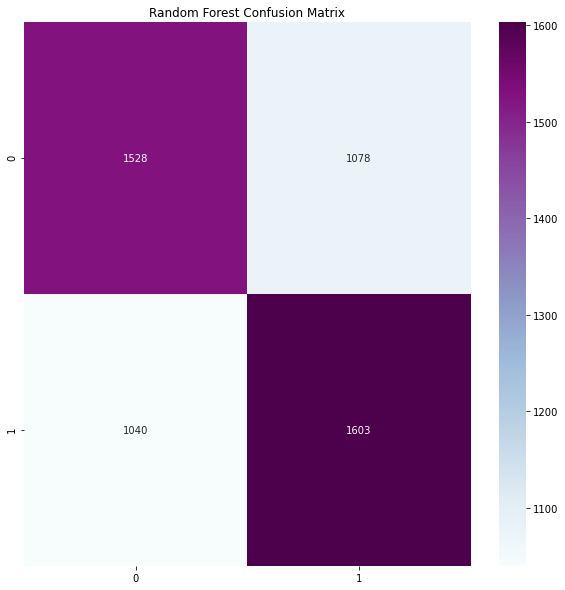

In [53]:
import seaborn as sns

plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_RF,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Random Forest Confusion Matrix')
plt.show()

**Conclusion**<br>
The main left diagonal represent all the cases that the model predict correctly (TN,TP).<br>
The rest cells represent all the cases the model predict incorrectly (FP,FN).<br>

Therefore, It can be concluded that Random Forest Model predicted correctly 1528 cats, and wrongly predicted 1078 cats as dogs,<br>
and predicted correctly 1603 dogs, and wrongly predicted 1040 dogs as cats. 



### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_test,RForestPred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      2606
           1       0.60      0.61      0.60      2643

    accuracy                           0.60      5249
   macro avg       0.60      0.60      0.60      5249
weighted avg       0.60      0.60      0.60      5249



**Conclusion**<br>

As we saw below in the confusion matrix, the FP **for dogs** is equal to 1040, and TP is equal to 1603.<br>
As we learned, **Precision** answer the question- What proportion of positive identifications was actually correct,<br>
and equal to:<br>
    $Precision=\frac {TP }{TP+FP}$ <br>
Therefore, we get:<br>
    $Precision=\frac {1603 }{1603+1078}=0.597=0.6$ <br>

The same **for cats**- the FP is equal to 1040, and TP is equal to 1528, and we get:<br>
$Precision=\frac {1528 }{1528+1040}=0.595=0.6$ <br>

**Recall**, answer the question- What proportion of actual positives was identified correctly,<br>
and equal to:<br>
 $Recall=\frac {TP }{TP+FN}$ <br>
Therefore, in dogs we get:<br>
    $Recall=\frac {1603 }{1603+1040}=0.606=0.61$ <br>
And in cats we get:<br>
    $Recall=\frac {1528 }{1528+1078}=0.586=0.59$ <br>

    
**F1 score** is defined as the harmonic mean between precision and recall, and It formula is:<br>
In cats:   $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}=\frac {2 \times0.6\times 0.59 }{0.6+0.59}=0.594=0.59$<br>
In dogs:   $F1 score=2 \times \frac{Precision \times Recall}{Precision+ Recall}=\frac {2\times0.6\times 0.61}{0.6+0.61}=0.604=0.6$
   

# Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners.<br>
The predictions are then combined through a weighted majority vote in case of classification (or a weighted sum in case of regression) to produce the final prediction.<br>
The models I will show are: AdaBoost, Gradient Boosting (XGBoost).

# <b> AdaBoost <b>
    
AdaBoost is the seconed model I will train.<br>
This model gives more attention to the training instances that the predecessor underfitted.<br>
This results in new predictors focusing more and more on the hard cases.

## Explain about method's parameters<b>
**n_estimators**- Number of weak learners to train iteratively.<br>
**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
    There is a trade-off between n_estimators to learning_rate. 

## Importing additional libraries

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## Fit & Predict

In [56]:
#Start measuring running time
StartTimeADA = time.time()

# instantiate the model
DecisionTreeClf = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(DecisionTreeClf, n_estimators=200, learning_rate=0.5)

# fit the model with data
ada_clf.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
ada_clfPred = ada_clf.predict(X_test_Reduced)

#Finish measuring running time
EndTimeADA = time.time()

#Toal running time
TotalTimeADA = EndTimeADA - StartTimeADA

#Add model's running time to RunningTimes array, and name to ModelName array
RunningTimes.append(TotalTimeADA)
ModelName.append('ADA')

**Accuracy,Classification Error (Misclassification Rate) :**


In [57]:
accuracyAda = metrics.accuracy_score(y_test, ada_clfPred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyAda)
print("the Classification Error for this model is:", 1 - accuracyAda)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyAda)

The Accuracy of this model is: 0.6052581444084587
the Classification Error for this model is: 0.3947418555915413


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the ADA Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [58]:
CM_ADA=confusion_matrix(y_test,ada_clfPred)
CM_ADA#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1742,  864],
       [1208, 1435]], dtype=int64)

Lets show Confusion Matrix as heat map:

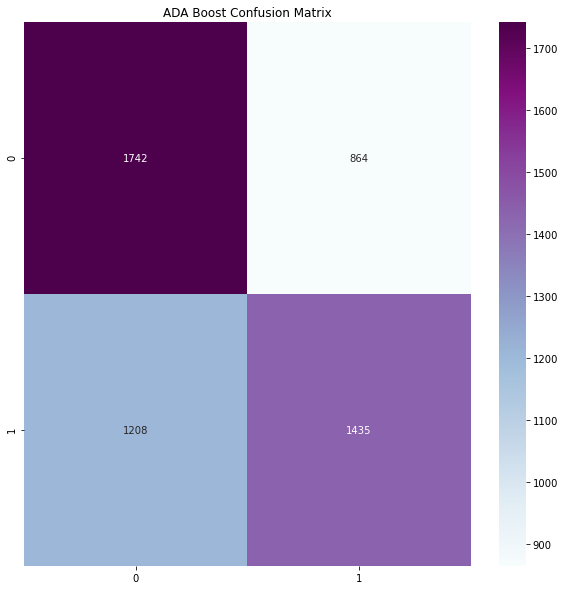

In [59]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ADA,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('ADA Boost Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [60]:
print (classification_report(y_test,ada_clfPred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      2606
           1       0.62      0.54      0.58      2643

    accuracy                           0.61      5249
   macro avg       0.61      0.61      0.60      5249
weighted avg       0.61      0.61      0.60      5249



**Conclusion**<br>
The main left diagonal of the Confusion Matrix represent all the cases that the model predict correctly (TN,TP).<br>
The rest cells represent all the cases the model predict incorrectly (FP,FN).<br>

Therefore, It can be concluded that AdaBoost Model predicted correctly 1742 cats, and wrongly predicted 864 cats as dogs,<br>
and predicted correctly 1435 dogs, and wrongly predicted 1208 dogs as cats. 

(I will not detail again the calculations in Classification reporet because I already did It above in Random Forest model and It is the same principle)

# Gradient Boosting

Just like AdaBoost,Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor.<br>
However, instead of tweaking the instance weights at every iteration like AdaBoost does, <br>
this method tries to fit the new predictor to the residual errors made by the previous predictor.


# <b> XGBoost  <b>
    
XGBoost is the third model I will train.<br>
XGBoost is an optimized implementation of Gradient Boosting , which stands for Extreme Gradient Boosting.<br>
This model have enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.<br>
It is the most common algorithm used for applied machine learning in competitions and has gained popularity through winning solutions in structured and tabular data

## Explain about method's parameters<b>

**learning_rate**- Shrinks the contribution of each classifier. It uses 1 as a default value.<br>
There is a trade-off between n_estimators to learning_rate.<br>
**n_estimators**- Number of weak learners to train iteratively.<br>
**verbosity**- Verbosity of printing messages. Valid values of 0 (silent), 1 (warning), 2 (info), and 3 (debug).<br>
**use_label_encoder**-  Use the label encoder from scikit-learn to encode the labels. <br>
For new code, It is recommend to set this parameter to False.


## Importing additional libraries

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings

## Fit & Predict


In [62]:
#Start measuring running time
StartTimeXG = time.time()

# instantiate the model
XGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 2000, verbosity=0,use_label_encoder=False)

# fit the model with data
XGBoost.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
XGBoost_Pred = XGBoost.predict(X_test_Reduced)

#Finish measuring running time
EndTimeXG = time.time()

#Toal running time
TotalTimeXG = EndTimeXG - StartTimeXG

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeXG)
ModelName.append('XG')

**Accuracy,Classification Error (Misclassification Rate) :**


In [63]:
accuracyXG = metrics.accuracy_score(y_test, XGBoost_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyXG)
print("the Classification Error for this model is:", 1 - accuracyXG)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyXG)

The Accuracy of this model is: 0.6336445037149934
the Classification Error for this model is: 0.36635549628500663


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the XG Boost classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [64]:
CM_XG=confusion_matrix(y_test,XGBoost_Pred)
CM_XG#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1778,  828],
       [1095, 1548]], dtype=int64)

Let's show Confusion Matrix as heat map:

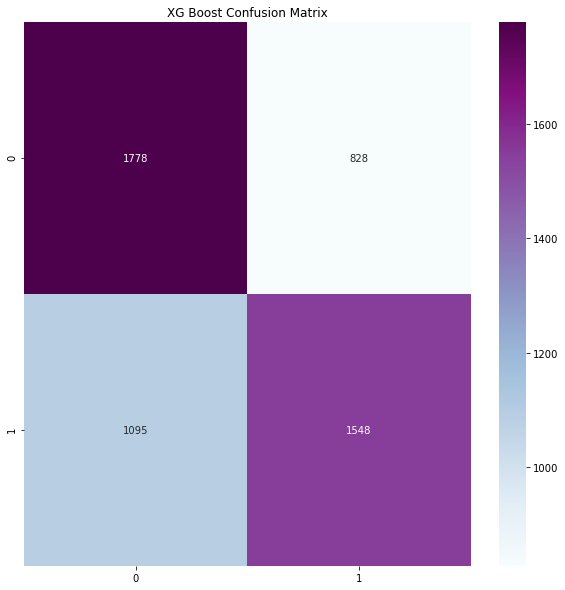

In [65]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_XG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('XG Boost Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [66]:
print (classification_report(y_test,XGBoost_Pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2606
           1       0.65      0.59      0.62      2643

    accuracy                           0.63      5249
   macro avg       0.64      0.63      0.63      5249
weighted avg       0.64      0.63      0.63      5249



**Conclusion**<br>
The main left diagonal of the Confusion Matrix represent all the cases that the model predict correctly (TN,TP).<br>
The rest cells represent all the cases the model predict incorrectly (FP,FN).<br>

Therefore, It can be concluded that XGBoost Model predicted correctly 1755 cats, and wrongly predicted 851 cats as dogs,<br>
and predicted correctly 1543 dogs, and wrongly predicted 1100 dogs as cats. 


# Simple Classification models<br>

Let's start implementing simple classification models we learned last semester, and then return to ensemble models.
I will explain this decision later.<br>

## <b>KNN model</b>
### <b> Which n_neighbors should I choose?<b>
    
First of all I ran for loop about different n_neighbors and checked the accuracy for eack case, <br>
then I chose the n_neighbors that gave me the most accurate value:<br>


In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#Please do not run this cell,It is very long time to be loaded
#i ran it in the start to see which n neighbors will be the best to choose
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(X_train_Reduced, y_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,X_train_Reduced, y_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=1 is 0.5419728891066471
Accuracy for k=2 is 0.5394414502694758
Accuracy for k=3 is 0.5600195982361588
Accuracy for k=4 is 0.5549567205618161
Accuracy for k=5 is 0.5609178507267679
Accuracy for k=6 is 0.5657357504491263
Accuracy for k=7 is 0.567042299526376
Accuracy for k=8 is 0.5648374979585171
Accuracy for k=9 is 0.5663890249877511
Accuracy for k=10 is 0.5625510370733301
Accuracy for k=11 is 0.5739016821819369
Accuracy for k=12 is 0.5714519026620937
Accuracy for k=13 is 0.5715335619794218
Accuracy for k=14 is 0.5727584517393434
Accuracy for k=15 is 0.5763514617017802
Accuracy for k=16 is 0.5804344275681855
Accuracy for k=17 is 0.5796994937122326
Accuracy for k=18 is 0.5798628123468887
Accuracy for k=19 is 0.5808427241548261


In [69]:
#This is the array of all the accuracies according to different n neighbors
scores

[0.5419728891066471,
 0.5394414502694758,
 0.5600195982361588,
 0.5549567205618161,
 0.5609178507267679,
 0.5657357504491263,
 0.567042299526376,
 0.5648374979585171,
 0.5663890249877511,
 0.5625510370733301,
 0.5739016821819369,
 0.5714519026620937,
 0.5715335619794218,
 0.5727584517393434,
 0.5763514617017802,
 0.5804344275681855,
 0.5796994937122326,
 0.5798628123468887,
 0.5808427241548261]

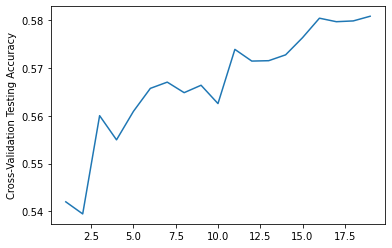

In [70]:
#Let's plot the relation between n and testing accuracy
n_neigh=list(range(1,20))
plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....
plt.show()

**Conclusion**<br>
It is possible to see that the bigger n neighbors I chose, the greater the accuracy.<br>
Therefore, I wolud like to contine and check about bigger numbers.<br>
Till now, I have checked about the numbers 0-19, now I would like to check about numbers 20-39.

In [71]:
scores=[]
for i in range(20,40):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(X_train_Reduced, y_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,X_train_Reduced, y_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=20 is 0.5814959986934509
Accuracy for k=21 is 0.5837008002613098
Accuracy for k=22 is 0.583864118895966
Accuracy for k=23 is 0.5842724154826066
Accuracy for k=24 is 0.5812510207414666
Accuracy for k=25 is 0.5850890086558876
Accuracy for k=26 is 0.5848440307039033
Accuracy for k=27 is 0.5868038543197779
Accuracy for k=28 is 0.5832925036746692
Accuracy for k=29 is 0.5863138984158092
Accuracy for k=30 is 0.5851706679732157
Accuracy for k=31 is 0.5858239425118406
Accuracy for k=32 is 0.5855789645598564
Accuracy for k=33 is 0.5844357341172628
Accuracy for k=34 is 0.5864772170504655
Accuracy for k=35 is 0.5857422831945125
Accuracy for k=36 is 0.5863955577331373
Accuracy for k=37 is 0.5887636779356524
Accuracy for k=38 is 0.5877837661277152
Accuracy for k=39 is 0.5874571288584027


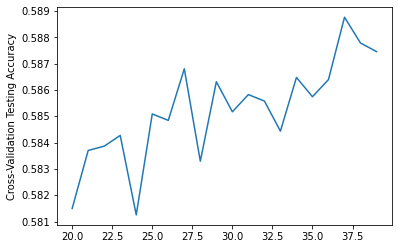

In [72]:
#Let's plot the relation between n and testing accuracy
n_neigh=list(range(20,40))

plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....
plt.show()

**Conclusion**<br>
It is possible to see that the accuracy continue to .<br>
Therefore, I wolud like to continue and check about bigger numbers.<br>
Till now, I have checked about the numbers 0-39, now I would like to check about numbers 60-69.

In [73]:
scores=[]
for i in range(60,70):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(X_train_Reduced, y_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,X_train_Reduced, y_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=60 is 0.5925200065327454
Accuracy for k=61 is 0.5912134574554957
Accuracy for k=62 is 0.5924383472154173
Accuracy for k=63 is 0.5924383472154173
Accuracy for k=64 is 0.5927649844847297
Accuracy for k=65 is 0.5934999183406827
Accuracy for k=66 is 0.5943981708312918
Accuracy for k=67 is 0.5924383472154173
Accuracy for k=68 is 0.5912951167728238
Accuracy for k=69 is 0.5905601829168707


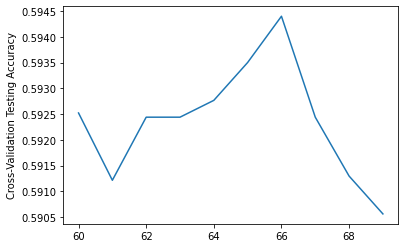

In [74]:
#Let's plot the relation between n and testing accuracy
n_neigh=list(range(60,70))

plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....
plt.show()

In [75]:
print('\033[1m' , 'Conclusion' , '\033[0m')
print("From the range that I have checked, it can be concluded that the best accuracy of KNN model is:", max(scores)) 
print("and It received when the number of neighbors is equal to 66.")


 Conclusion 
From the range that I have checked, it can be concluded that the best accuracy of KNN model is: 0.5943981708312918
and It received when the number of neighbors is equal to 66.


## Fit&Predict

In [76]:
#Start measuring running time
StartTimeKNN = time.time()

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=66)

# fit the model with data
knn.fit(X_train_Reduced, y_train)


# make predictions on the testing set (predict for first_test)
Knn_Pred=knn.predict(X_test_Reduced)

#Finish measuring running time
EndTimeKNN = time.time()

#Toal running time
TotalTimeKNN = EndTimeKNN - StartTimeKNN

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeKNN)
ModelName.append('KNN')

**Accuracy,Classification Error (Misclassification Rate) :**

In [77]:
accuracyKNN = metrics.accuracy_score(y_test, Knn_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyKNN)
print("the Classification Error for this model is:", 1 - accuracyKNN)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyKNN)

The Accuracy of this model is: 0.599352257572871
the Classification Error for this model is: 0.40064774242712897


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the KNN classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [78]:
CM_KNN=confusion_matrix(y_test,Knn_Pred)
CM_KNN#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1420, 1186],
       [ 917, 1726]], dtype=int64)

Lets show Confusion Matrix as heat map:

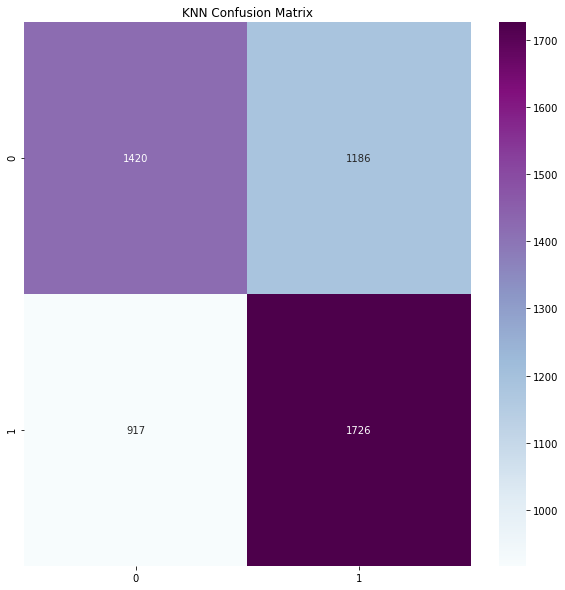

In [79]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_KNN,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('KNN Confusion Matrix')
plt.show()

### Classification Report

In [80]:
print (classification_report(y_test,Knn_Pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57      2606
           1       0.59      0.65      0.62      2643

    accuracy                           0.60      5249
   macro avg       0.60      0.60      0.60      5249
weighted avg       0.60      0.60      0.60      5249



**Conclusion**<br>
It can be concluded that KNN Model predicted correctly 1420 cats, and wrongly predicted 1186 cats as dogs,<br>
and predicted correctly 1726 dogs, and wrongly predicted 917 dogs as cats. 


## <b>Logistic Regression model</b>


In [81]:
from sklearn.linear_model import LogisticRegression

#Start measuring running time 
StartTimeLR = time.time()

# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter=400)

# fit the model with data
log_reg.fit(X_train_Reduced, y_train)

#make predictions on the testing set
Log_Pred = log_reg.predict(X_test_Reduced)

#Finish measuring running time
EndTimeLR = time.time()

#Toal running time  
TotalTimeLR = EndTimeLR - StartTimeLR

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeLR)
ModelName.append('Logistic_Regression')


**Accuracy,Classification Error (Misclassification Rate) :**

In [82]:
accuracyLR = metrics.accuracy_score(y_test, Log_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyLR)
print("the Classification Error for this model is:", 1 - accuracyLR)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyLR)

The Accuracy of this model is: 0.5368641646027815
the Classification Error for this model is: 0.4631358353972185


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the KNN classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [83]:
CM_LR=confusion_matrix(y_test,Log_Pred)
CM_LR

array([[1458, 1148],
       [1283, 1360]], dtype=int64)

Lets show Confusion Matrix as heat map:

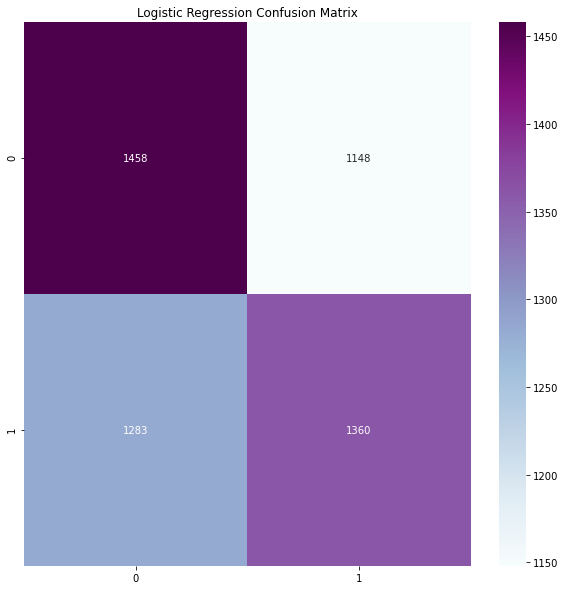

In [84]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_LR,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Logistic Regression Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [85]:
print (classification_report(y_test,Log_Pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55      2606
           1       0.54      0.51      0.53      2643

    accuracy                           0.54      5249
   macro avg       0.54      0.54      0.54      5249
weighted avg       0.54      0.54      0.54      5249



**Conclusion**<br>
It can be concluded that Logistic Regression Model predicted correctly 1458 cats, and wrongly predicted 1148 cats as dogs,<br>
and predicted correctly 1360 dogs, and wrongly predicted 1283 dogs as cats. 


# Subtotal Of All Models Accuracies&RunTime

In [86]:
print(Accuracies)
print(ModelName)

#define df
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])
data



[0.5964945703943608, 0.6052581444084587, 0.6336445037149934, 0.599352257572871, 0.5368641646027815]
['RF', 'ADA', 'XG', 'KNN', 'Logistic_Regression']


,Model,Accuracies,RunTime
0,RF,0.596495,19.991731
1,ADA,0.605258,203.807703
2,XG,0.633645,365.661212
3,KNN,0.599352,1.413247
4,Logistic_Regression,0.536864,2.020999


# Back To Ensemble learning Models

Now, After I finished the implement of the simple classification models, I would like to continue with the Ensemble learning Models. <br>
I have preferred to implement those simple classification models before using the models: Bagging, Stacking, Voting  
because those three models may use part  (or all) those simple classification models. <br>
It explain in each model in detail later in the notebook.

# <b> Bagging&Pasting  <b>
    
Bagging stands for bootstrap aggregation. One way to reduce the variance of an estimate is to average together multiple estimates. For aggregating the outputs of base learners in case of classification, bagging uses Voting (and averaging in case of regression).<br>
For example, random forest trains X Decision Tree, It is possible to train X different trees on different random subsets of the data and perform voting for final prediction.<br>
Bagging ensembles methods are Random Forest and Extra Trees.<br>
    
In other words, Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset,<br> and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    
Bagging is composed of two parts: aggregation and bootstrapping.<br>
Bootstrapping is a sampling method, where a sample is chosen out of a set, using the replacement method. <br>
The learning algorithm is then run on the samples selected.<br>

The bootstrapping technique uses sampling with replacements to make the selection procedure completely random. <br>
When a sample is selected without replacement, the subsequent selections of variables are always dependent on the previous selections, making the criteria non-random. <br>   
    
When sampling is performed without replacement, it is called **pasting**.<br>

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors,<br>
but only bagging allows training instances to be sampled several times for the same predictor.



## Explain about method's parameters<b>

**base_estimator**-The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a Decision Tree Classifier.In my case, I have chosed XGBoost because It is the model with the best accuracy til now.<br>
**n_estimators**- The number of base estimators in the ensemble <br>
**bootstrap**- Whether samples are drawn with replacement (as I explained above). If False, sampling without replacement is performed.   <br>

# Bagging


## Importing additional libraries


In [87]:
from sklearn.ensemble import BaggingClassifier

## Fit & Predict

In [88]:
#Start measuring running time
StartTimeBagging = time.time()

# instantiate the model
Bagging = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = True)

# fit the model with data
Bagging.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Bagging_Pred = Bagging.predict(X_test_Reduced)

#Finish measuring running time
EndTimeBagging = time.time()

#Toal running time
TotalTimeBagging = EndTimeBagging - StartTimeBagging

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeBagging)
ModelName.append('Bagging')


C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


**Accuracy,Classification Error (Misclassification Rate) :**

In [89]:
accuracyBagging = metrics.accuracy_score(y_test, Bagging_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyBagging)
print("the Classification Error for this model is:", 1 - accuracyBagging)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyBagging)

The Accuracy of this model is: 0.6412650028576872
the Classification Error for this model is: 0.35873499714231283


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Bagging classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [90]:
CM_BAG=confusion_matrix(y_test,Bagging_Pred)
CM_BAG#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1790,  816],
       [1067, 1576]], dtype=int64)

Lets show Confusion Matrix as heat map:

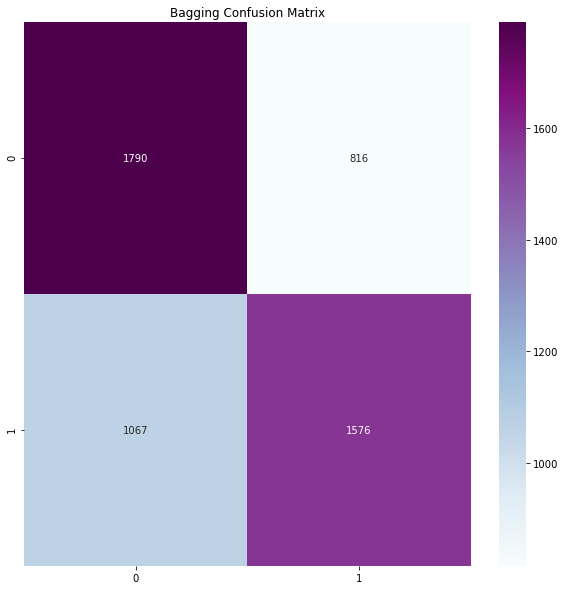

In [91]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_BAG,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [92]:
print (classification_report(y_test,Bagging_Pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      2606
           1       0.66      0.60      0.63      2643

    accuracy                           0.64      5249
   macro avg       0.64      0.64      0.64      5249
weighted avg       0.64      0.64      0.64      5249



**Conclusion**<br>
It can be concluded that Bagging Model predicted correctly 1806 cats, and wrongly predicted 800 cats as dogs,<br>
and predicted correctly 1575 dogs, and wrongly predicted 1068 dogs as cats. 

# Pasting

## Fit & Predict

In [93]:
#Start measuring running time
StartTimePasting = time.time()

# instantiate the model
Pasting = BaggingClassifier(XGBoost, n_estimators = 100, bootstrap = False)

# fit the model with data
Pasting.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Pasting_Pred = Pasting.predict(X_test_Reduced)

#Finish measuring running time
EndTimePasting = time.time()

#Toal running time
TotalTimePasting = EndTimePasting - StartTimePasting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimePasting)
ModelName.append('Pasting')


C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


**Accuracy,Classification Error (Misclassification Rate) :**

In [94]:
accuracyPasting = metrics.accuracy_score(y_test, Pasting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyPasting)
print("the Classification Error for this model is:", 1 - accuracyPasting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyPasting)

The Accuracy of this model is: 0.6336445037149934
the Classification Error for this model is: 0.36635549628500663


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Pasting classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [95]:
CM_PAS=confusion_matrix(y_test,Pasting_Pred)
CM_PAS

array([[1778,  828],
       [1095, 1548]], dtype=int64)

Let's show Confusion Matrix as heat map:

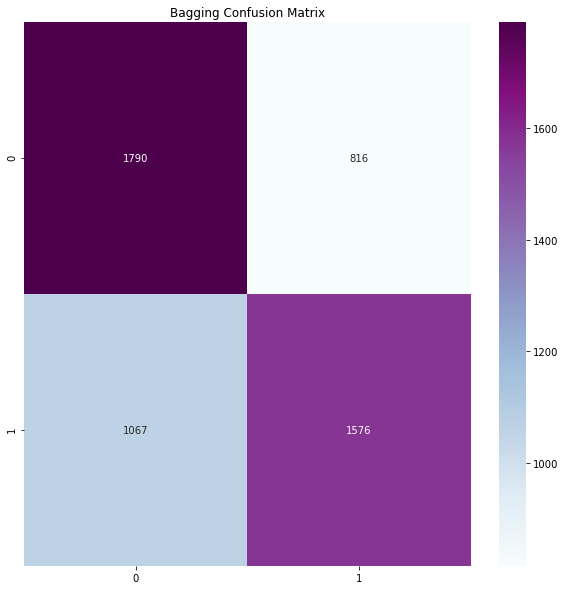

In [96]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_PAS,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Bagging Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [97]:
print (classification_report(y_test,Pasting_Pred))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      2606
           1       0.65      0.59      0.62      2643

    accuracy                           0.63      5249
   macro avg       0.64      0.63      0.63      5249
weighted avg       0.64      0.63      0.63      5249



**Conclusion**<br>
It can be concluded that Bagging Model predicted correctly 1778 cats, and wrongly predicted 828 cats as dogs,<br>
and predicted correctly 1548 dogs, and wrongly predicted 1095 dogs as cats. 

# <b> Stacking  <b>
Instead of using trivial functions (such as hard voting) to combine the predictions of all classifiers in an ensemble,<br>
in Stacking we are training a model to perform this combination.<br>
Actually we can say we have Stack of estimators with a final classifier (The final classifier to "classify the classifiers" is chosen to be Logistic Regression).<br>

## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>


## Importing additional libraries

In [98]:
from sklearn.ensemble import StackingClassifier

## Fit & Predict

In [99]:
#Start measuring running time
StartTimeStacking = time.time()

# instantiate the model
Stacking = StackingClassifier(estimators= [ ('rf', RForest),('logr', log_reg),('ab',ada_clf),('xb',XGBoost), ('knn', knn)])

# fit the model with data
Stacking.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred = Stacking.predict(X_test_Reduced)

#Finish measuring running time
EndTimeStacking = time.time()

#Toal running time
TotalTimeStacking = EndTimeStacking - StartTimeStacking


C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

**Accuracy,Classification Error (Misclassification Rate) :**

In [100]:
accuracyStacking = metrics.accuracy_score(y_test, Stacking_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyStacking)
print("the Classification Error for this model is:", 1 - accuracyStacking)


The Accuracy of this model is: 0.6401219279862831
the Classification Error for this model is: 0.3598780720137169


Now I would like to try and fit the Stacking Classifier without Logistic Regression , because this model has the lowest accuracy:

In [101]:
#Start measuring running time
StartTimeStacking_ = time.time()

# instantiate the model
Stacking_ = StackingClassifier(estimators= [ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn)])

# fit the model with data
Stacking_.fit(X_train_Reduced, y_train)

# make predictions on the testing set (predict for first_test)
Stacking_Pred_ = Stacking_.predict(X_test_Reduced)

#Finish measuring running time
EndTimeStacking_ = time.time()

#Toal running time
TotalTimeStacking_ = EndTimeStacking_ - StartTimeStacking_

#Add model's running time to RunningTimes array, and name to ModelName array 
accuracyStacking_ = metrics.accuracy_score(y_test, Stacking_Pred_)#check the predictions with the real values


print("The Accuracy of this model is:",accuracyStacking_)
print("the Classification Error for this model is:", 1 - accuracyStacking_)



C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

The Accuracy of this model is: 0.6437416650790627
the Classification Error for this model is: 0.3562583349209373


In [102]:
#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeStacking_)
ModelName.append('Stacking')
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyStacking_)

## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Stacking classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [103]:
CM_ST=confusion_matrix(y_test,Stacking_Pred_)
CM_ST#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1792,  814],
       [1056, 1587]], dtype=int64)

Lets show Confusion Matrix as heat map:

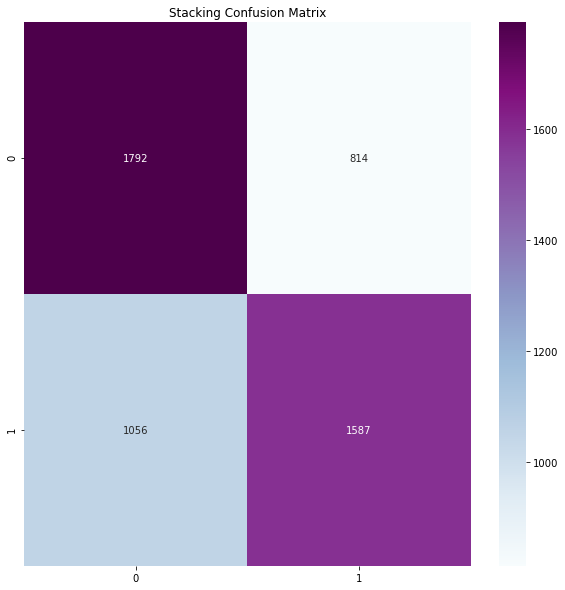

In [104]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_ST,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Stacking Confusion Matrix')
plt.show()

### Classification Report

Let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method:

In [105]:
print (classification_report(y_test,Stacking_Pred_))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      2606
           1       0.66      0.60      0.63      2643

    accuracy                           0.64      5249
   macro avg       0.65      0.64      0.64      5249
weighted avg       0.65      0.64      0.64      5249



**Conclusion**<br>
It can be concluded that Stacking Model predicted correctly 1792 cats, and wrongly predicted 814 cats as dogs,<br>
and predicted correctly 1587 dogs, and wrongly predicted 1056 dogs as cats. 


# <b> Voting Classifier  <b>
  
Until now, I have trained a few classifiers, each one achieving about  99-100% accuracy.<br>
Now, I will show Voting Classifier.<br>

Voting classifier takes majority voting based on weights applied to the class or class probabilities and assigns a class label to a record based on majority vote.<br> 
In other words, Voting model aggregate the predictions of each classification model and predict the class that gets the most votes. <br>
    
There are two different voting schemes are common among voting classifiers:<br>
1. **Hard voting (majority voting)**<br>
Every individual classifier votes for a class, and the majority wins.<br>
In statistical terms, the predicted target label of the ensemble is the mode of the distribution of individually predicted labels.
2. **Soft voting**<br>
Every individual classifier provides a probability value that a specific data point belongs to a particular target class.<br> The predictions are weighted by the classifier's importance and summed up.<br>
Then the target label with the greatest sum of weighted probabilities wins the vote.<br>
    
    
## Explain about method's parameters<b>

**estimators**- List of tuples. Invoking the fit method on the VotingClassifier will fit clones of those original estimators that will be stored in the class attribute self.estimators_.<br>
**voting**- Can be 'hard' or 'soft'. As I already explain before- If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.  <br>
    
## Importing additional libraries

In [106]:
from sklearn.ensemble import VotingClassifier
import warnings

In [107]:
#Let's see again the df I have already created:
data

,Model,Accuracies,RunTime
0,RF,0.596495,19.991731
1,ADA,0.605258,203.807703
2,XG,0.633645,365.661212
3,KNN,0.599352,1.413247
4,Logistic_Regression,0.536864,2.020999


## Fit & Predict

**Conclusion**
As you can see in the next cell, the models I have chosed are:Random Forests,Ada Boost,XGBoost,Knn,Bagging, Stacking.<br>
I do not chose Logistic Regression because It is the model with the lowest accuracy .


In [109]:
#Start measuring running time
StartTimeVoting = time.time()

# instantiate the model
Voting = VotingClassifier(estimators=[ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn),('bagg',Bagging),('stack',Stacking),('past',Pasting)],voting='soft')

# fit the model with data
Voting.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred = Voting.predict(X_test_Reduced)

#Finish measuring running time
EndTimeVoting = time.time()

#Toal running time
TotalTimeVoting = EndTimeVoting - StartTimeVoting

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeVoting)
ModelName.append('Voting')

C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndar

**Accuracy,Classification Error (Misclassification Rate) :**

In [110]:
accuracyVoting = metrics.accuracy_score(y_test, Voting_Pred)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyVoting)
print("the Classification Error for this model is:", 1 - accuracyVoting)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyVoting)

The Accuracy of this model is: 0.6429796151647933
the Classification Error for this model is: 0.3570203848352067


## Model evaluation metrics for classification

### Confusion Matrix

To visualize how many values the Voting classifier predicted correctly, <br>
I will compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:

In [111]:
CM_VOT=confusion_matrix(y_test,Voting_Pred)
CM_VOT#It's a 2x2 matrix because there are 2 response classes (0,1)

array([[1788,  818],
       [1056, 1587]], dtype=int64)

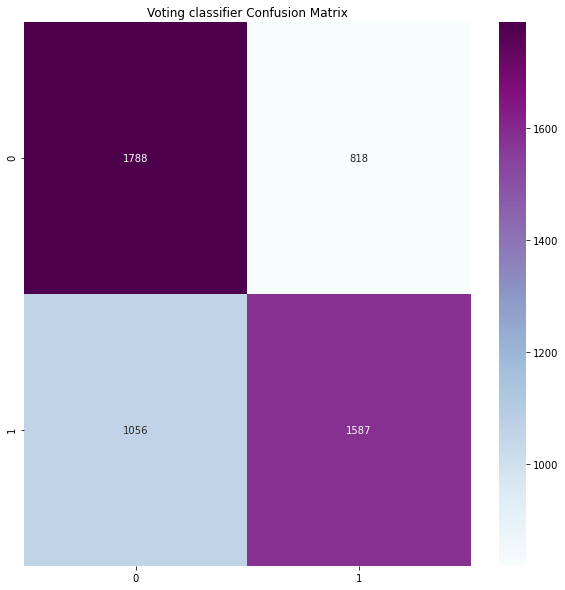

In [112]:
plt.figure(figsize=(10,10))#set size
sns.heatmap(CM_VOT,cmap = "BuPu", annot=True, fmt = '.0f')
plt.title ('Voting classifier Confusion Matrix')
plt.show()

### Classification Report

In [113]:
print (classification_report(y_test,Voting_Pred))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66      2606
           1       0.66      0.60      0.63      2643

    accuracy                           0.64      5249
   macro avg       0.64      0.64      0.64      5249
weighted avg       0.64      0.64      0.64      5249



**Conclusion**<br>
It can be concluded that Voting Model predicted correctly 1788 cats, and wrongly predicted 818 cats as dogs,<br>
and predicted correctly 1587 dogs, and wrongly predicted 1056 dogs as cats. 


## <b>Choosing Dummy Classifier</b><br>
In our class we learned about 4 different kinds of dummy classifiers-<br>
1. most_frequent-**always** predicts the most frequent label in the training set.<br>
2. stratified-generates predictions by respecting the **training set’s class distribution**.<br>
3. uniform-generates predictions uniformly at **random**.<br>
4. constant-always predicts a label that **we provide him**.<br>
**How will we going to choose the right dummy classifier?**<br>
We will check the accuracy of each dummy classifier and choose the most accurate one.<br>


In [114]:
#most_frequent dummy classifier:
from sklearn.dummy import DummyClassifier

#Start measuring running time
StartTimeDummyMF = time.time()

dcM=DummyClassifier(strategy="most_frequent",random_state=42)
dcM.fit(X_train_Reduced, y_train)
PredictionsM=dcM.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyMF = time.time()

#Total running time
TotalTimeDummyMF= EndTimeDummyMF - StartTimeDummyMF

most_frequentAccu=metrics.accuracy_score(y_test,PredictionsM)
print("The accuracy of the most_frequent dummy classifier prediction is:",most_frequentAccu)


The accuracy of the most_frequent dummy classifier prediction is: 0.4964755191465041


In [115]:
#stratified dummy classifier:

#Start measuring running time
StartTimeDummySt = time.time()

dcS=DummyClassifier(strategy="stratified",random_state=42)
dcS.fit(X_train_Reduced, y_train)
PredictionsS=dcS.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummySt = time.time()

#Total running time
TotalTimeDummySt= EndTimeDummySt - StartTimeDummySt

stratifiedAccu=metrics.accuracy_score(y_test,PredictionsS)
print("The accuracy of the stratified dummy classifier prediction is:",stratifiedAccu)



The accuracy of the stratified dummy classifier prediction is: 0.49247475709658983


In [116]:
#uniform dummy classifier:

#Start measuring running time
StartTimeDummyUni = time.time()

dcU=DummyClassifier(strategy="uniform",random_state=42)
dcU.fit(X_train_Reduced, y_train)
PredictionsU=dcU.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyUni = time.time()

#Total running time
TotalTimeDummyUni= EndTimeDummyUni - StartTimeDummyUni

uniformAccu=metrics.accuracy_score(y_test,PredictionsU)
print("The accuracy of the uniform dummy classifier prediction is:",uniformAccu)


The accuracy of the uniform dummy classifier prediction is: 0.5098113926462183


In [117]:
#constant dummy classifier:

#Start measuring running time
StartTimeDummyCon = time.time()

dcC=DummyClassifier(strategy="constant",random_state=42, constant=1)#why 1? because we saw that most of the password have this strenght value
dcC.fit(X_train_Reduced, y_train)
PredictionsC=dcC.predict(X_test_Reduced)

#Finish measuring running time
EndTimeDummyCon = time.time()

#Total running time
TotalTimeDummyCon= EndTimeDummyCon - StartTimeDummyCon

constantAccu=metrics.accuracy_score(y_test,PredictionsC)
print("The accuracy of the constant dummy classifier prediction is:",constantAccu)


The accuracy of the constant dummy classifier prediction is: 0.5035244808534959


In [118]:
#Create array of all accuracies:
DummyAccu=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]
DummyRuntime=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon]
ModelNameDummy=['most_frequent','stratified','uniform','constant']

#find the max&min values from RunningTimes array
max_RunTime = np.max(DummyRuntime)
min_RunTime = np.min(DummyRuntime)

#find the index of max&min values
index_maxRunTime=DummyRuntime.index(max_RunTime)
index_minRunTime=DummyRuntime.index(min_RunTime)

print("The model with the longest runtime is",ModelNameDummy[index_maxRunTime], "with running time of:",max_RunTime  )
print("The model with the shortest runtime is",ModelNameDummy[index_minRunTime], "with running time of:",min_RunTime  )


#find the max&min values from RunningTimes array
max_Accuracy = np.max(DummyAccu)
min_Accuracy = np.min(DummyAccu)

#find the index of max&min values
index_maxAccuracy=DummyAccu.index(max_Accuracy)
index_minAccuracy=DummyAccu.index(min_Accuracy)

print("The model with the best accuracy is",ModelNameDummy[index_maxAccuracy], "with accuracy of:",max_Accuracy  )
print("The model with the worst accuracy is",ModelNameDummy[index_minAccuracy], "with accuracy of:",min_Accuracy  )

The model with the longest runtime is stratified with running time of: 0.0029931068420410156
The model with the shortest runtime is uniform with running time of: 0.000997781753540039
The model with the best accuracy is uniform with accuracy of: 0.5098113926462183
The model with the worst accuracy is stratified with accuracy of: 0.49247475709658983


## Plot Dummies Models Accuracy&RunTime

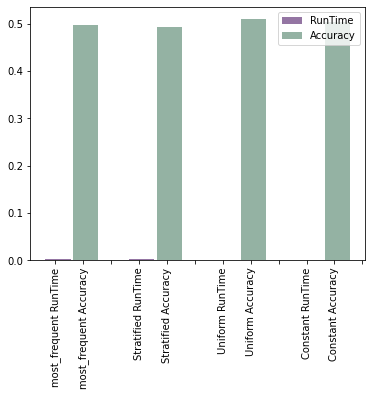

In [119]:
# Create bars
barWidth = 0.9 #Width of each bar

bars1=[TotalTimeDummyMF,TotalTimeDummySt,TotalTimeDummyUni,TotalTimeDummyCon] # X values of purple bars, represent the running time
bars2=[most_frequentAccu,stratifiedAccu,uniformAccu,constantAccu]#Y values of green bars, represent the accuracies
 
# The X position of bars
r1=[1,4,7,10]
r2=[2,5,8,11]
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='RunTime')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='Accuracy')

# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(12)], ['most_frequent RunTime', 'most_frequent Accuracy', ' ', 'Stratified RunTime', 'Stratified Accuracy', ' ', 'Uniform RunTime', 'Uniform Accuracy', ' ', 'Constant RunTime', 'Constant Accuracy', ' '], rotation=90)

# Adjust the margins
plt.subplots_adjust(bottom= 0.1, top = 0.98)

# Show graphic
plt.show()

**Conclusion**<br>
As It is possible to see, and also as I have already computed, the best Dummy model- both in terms of runtime and in terms of accuracy is: Uniform model.|<br>
Therefore it will be the chosen model, and my final accuracy should be higher than this model accuracy.<br>
Let's add Uniform Dummy Classifier to the arrays of accuracy and runtime:


In [120]:
#Add model's accuracy to Accuracies array
Accuracies.append(uniformAccu)
#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeDummyUni)
ModelName.append('Uniform Dummy')

In [121]:
#Let's add to our df new 4 rows for -Bagging,Stacking,Voting and Dummy models 

#define df again with all models:
data = pd.DataFrame({'Model': ModelName, 'Accuracies': list(Accuracies), 'RunTime':list(RunningTimes)}, columns=['Model', 'Accuracies', 'RunTime'])
data

,Model,Accuracies,RunTime
0,RF,0.596495,19.991731
1,ADA,0.605258,203.807703
2,XG,0.633645,365.661212
3,KNN,0.599352,1.413247
4,Logistic_Regression,0.536864,2.020999
5,Bagging,0.641265,28405.549080
6,Pasting,0.633645,36319.243125
7,Stacking,0.643742,2789.940211
8,Voting,0.642980,71033.143966
9,Uniform Dummy,0.509811,0.000998


Now, after I trained all the models I will compare their ROC curves.

## <b>ROC curves and AUC ROC </b><br>


### <b> ROC Curves<b>

I will show the ROC Curve for the Random Forests Classifier model, and because all the accuracies in all models are equal to 1,<br>
we can concluse that there is no False Psitive Rate- so all models will be displayed the same.<br>
Therefore there is no need to show the ROC Curves for all models, and I will show it for one model to get an intuition.

C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


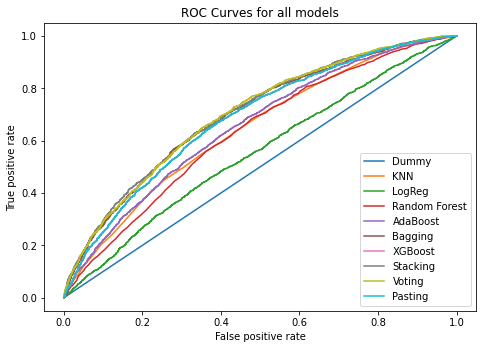

In [122]:
probsKNN = knn.predict_proba(X_test_Reduced)[:, 1]
probsLogReg = log_reg.predict_proba(X_test_Reduced)[:, 1]
probsRF = RForest.predict_proba(X_test_Reduced)[:, 1]
probsAda = ada_clf.predict_proba(X_test_Reduced)[:, 1]
probsBag = Bagging.predict_proba(X_test_Reduced)[:, 1]
probsXG = XGBoost.predict_proba(X_test_Reduced)[:, 1]
probsStacking = Stacking_.predict_proba(X_test_Reduced)[:, 1]
probsVoting = Voting.predict_proba(X_test_Reduced)[:, 1]
dummyProbs = dcU.predict_proba(X_test_Reduced)[:, 1]
probsPasting = Pasting.predict_proba(X_test_Reduced)[:, 1]

fprKNN, tprKNN, thresholdsKNN = metrics.roc_curve(y_test, probsKNN)
fprLogReg, tprLogReg, thresholdsLogReg = metrics.roc_curve(y_test, probsLogReg)
fprRandFor, tprRandFor, thresholdsRandFor = metrics.roc_curve(y_test, probsRF)
fprAdaB, tprAdaB, thresholdsAdaB = metrics.roc_curve(y_test, probsAda)
fprBag, tprBag, thresholdsBag = metrics.roc_curve(y_test, probsBag)
fprXGB, tprXGB, thresholdsXGB = metrics.roc_curve(y_test, probsXG)
fprSta, tprSta, thresholdsSta = metrics.roc_curve(y_test, probsStacking)
fprVot, tprVot, thresholdsVot = metrics.roc_curve(y_test, probsVoting)
fprDummy, tprDummy, thresholdsDummy = metrics.roc_curve(y_test, dummyProbs)
fprPas, tprPas, thresholdsPas = metrics.roc_curve(y_test, probsPasting)

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(fprDummy, tprDummy, label = "Dummy")
axes.plot(fprKNN, tprKNN, label = "KNN")
axes.plot(fprLogReg, tprLogReg, label = "LogReg")
axes.plot(fprRandFor, tprRandFor, label = "Random Forest")
axes.plot(fprAdaB, tprAdaB, label = "AdaBoost")
axes.plot(fprBag, tprBag, label = "Bagging")
axes.plot(fprXGB, tprXGB, label = "XGBoost")
axes.plot(fprSta, tprSta, label = "Stacking")
axes.plot(fprVot, tprVot, label = "Voting")
axes.plot(fprPas, tprPas, label = "Pasting")

axes.set_xlabel("False positive rate")
axes.set_ylabel("True positive rate")
axes.set_title("ROC Curves for all models")
axes.legend()


# <b> Finding The Best RunTime   <b>
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [123]:
#Conclusion from the df I created
column = data["RunTime"]
min_RT = column.min()

min_RT_Name=data.loc[data.RunTime == min_RT, 'Model'].values[0]

print("The model with shortest runtime is:",min_RT_Name ,"with accuracy of:" ,min_RT)

The model with shortest runtime is: Uniform Dummy with accuracy of: 0.000997781753540039


In [124]:
#Conclusion from the arrays I created
#find the max&min values from RunningTimes array
max_RunTime = np.max(RunningTimes)
min_RunTime = np.min(RunningTimes)

#find the index of max&min values
index_maxRunTime=RunningTimes.index(max_RunTime)
index_minRunTime=RunningTimes.index(min_RunTime)

print("The model with the highest runtime is",ModelName[index_maxRunTime], "with running time of:",max_RunTime,"and accuracy of:",Accuracies[index_maxRunTime] )
print("The model with the lowest runtime is",ModelName[index_minRunTime], "with running time of:",min_RunTime,"and accuracy of:",Accuracies[index_minRunTime]  )

The model with the highest runtime is Voting with running time of: 71033.14396619797 and accuracy of: 0.6429796151647933
The model with the lowest runtime is Uniform Dummy with running time of: 0.000997781753540039 and accuracy of: 0.5098113926462183


## <b>RunTime Visualization </b>

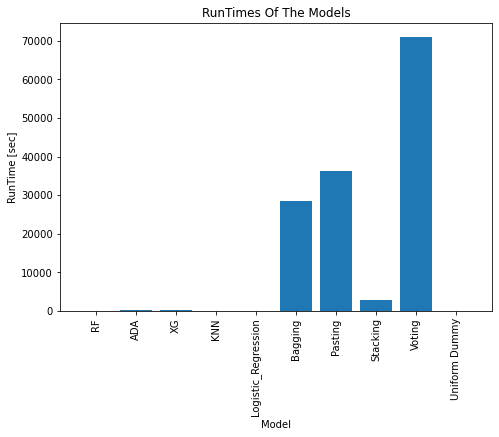

In [125]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,RunningTimes)
plt.title('RunTimes Of The Models')
plt.xlabel('Model')
plt.ylabel('RunTime [sec]')
plt.xticks(rotation=90)
plt.show()

# <b> Finding The Best Accuracy   <b>
    
I will use both array that I initialize above to find the Max&Min run time of all models: 

In [126]:
#Conclusion from the df I created
column = data["Accuracies"]
max_Acu = column.max()

max_Acu_Name=data.loc[data.Accuracies == max_Acu, 'Model'].values[0]

print("The model with best accuracy is:",max_Acu_Name ,", with accuracy of:" ,max_Acu)

The model with best accuracy is: Stacking , with accuracy of: 0.6437416650790627


## <b>Accuracy Visualization </b>


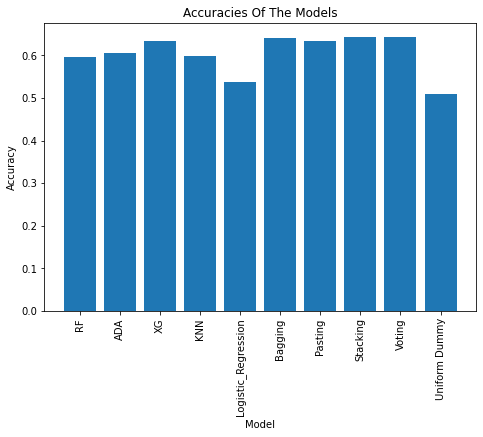

In [127]:
figure=plt.figure()

axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 It is width and 1 height 
axes.bar(ModelName,Accuracies)
plt.title('Accuracies Of The Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

# Conclusion about the best model<br>

As we learned- the definition for 'Best Model' depends on a few things:<br>
1.Accuracy<br>
2.Runtime<br>
These two conditions depends on costumer request-<br>
If the costumer requires a model with higher accuracy- than I will use Voting Classifier model<br>
If the costumer requires a model with the fastest runtime- than I will use Random Forests or KNN models. I will not choose Logistic Regression because althoght it has the fastest runtime (after dummy)- It accuracy is very low. <br>
In my notebook, I will choose the best model as the most accurate model-means Voting.



# Try to improve the best model

After I found the best model, I would like to try improve It.<br>
first, I will try to do so by the following steps:<br>
1. Grid Search<br>
2. Another run of the Voting Classifier model after chosen values from the Grid Search<br>
3. Confusion Matrix&Classification report for the 'improved model'

## Grid Search

As I have already explained in the first notebook, due to low computer performence of my PC , It is immpossible to use Grid Search,<br> anyway, I want to show how I supposed to use the function and which parameters I would change:

In [128]:
from sklearn.model_selection import GridSearchCV
#RF,Ada,XG,KNN,Bagging,stacking,pasting classifiers are used. These models are first built and added to a list
#for the prupose of grid search. 
#Here all models are added
classifiers=[]
classifiers.append(RForest)
classifiers.append(ada_clf)
classifiers.append(XGBoost)
classifiers.append(knn)
classifiers.append(Bagging)
classifiers.append(Pasting)



In [129]:
#Parameters dict needed for the above added models are added to a list called parameters
#in order. The differnt possible values for hyper parameters for each model is taken as parameters
# and grid search will tell us which was the best combination for each model.
parameters=[]

#Add the parameters for Random Forests
parameters_RF = {
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200,500,800,1100,1400,1700,2000,2300,2600,2900]}
parameters.append(parameters_RF)

#Add the parameters for KNN
parameters_knn = {
                 "n_neighbors": [3,6,9,12],
                 "weights": ['uniform','distance'],
                 "p":[1,2,3]}
parameters.append(parameters_knn)

#Add the parameters for Ada boost
parameters_Ada= {
             'n_estimators': [50,100,200,500,800,1100,1400,1700,2000,2300],
             'learning_rate': [0.2,0.4,0.6,0.8,1]
}
parameters.append(parameters_Ada)
                              
#Add the parameters for XG
parameters_XG= {
             'n_estimators': [200,500,800,1100,1400,1700,2000,2300,2600,2900],
             'learning_rate': [0.2,0.4,0.6,0.8,1]
}
parameters.append(parameters_XG)
                                                       

                              
#Add the parameters for Bagging
parameters_bag = {
                'n_estimators': [50,100,200,500,800,1100,1400,1700,2000,2300],
                 }
parameters.append(parameters_bag)
                              
#Add the parameters for Pasting
parameters_past = {
                'n_estimators': [50,100,200,500,800,1100,1400,1700,2000,2300],
                 }
parameters.append(parameters_past)
                              


In [130]:
#Here grid search is performed for each model. THe best estimator combination for each model
#is stored in a list best_models.
from tqdm import tqdm
def gridSearchCV(models,params,count):
    best_models=[]
    for i in tqdm(range(0,count)):
        model_grid = GridSearchCV(models[i], parameters[i], n_jobs=-1, verbose=1, cv=5)
        model_grid.fit(X_train_Reduced, y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

#best_model_list = gridSearchCV(classifiers,parameters,4)

## The final best voting classifier model, after grid search:

I put that cell in markdown because I can not get the best Voting model because the grid search is not run on my PC due to low computer performance.

#Voting classifier is given the best models of the models I wrote above. It fits all models with
#given data. Eventually predictions are made through a voting system. THe voting chosen here
#is soft, which means it takes the argmax of the sums of predicted probabilities. THis ensemble
#method helps to make predictions more reliable. 

#Start measuring running time
StartTimeVoting_imp = time.time()

#instantiate the model
Voting_imp = VotingClassifier(estimators=[('mlp', best_model_list[0]), ('sgd', best_model_list[1]), 
                                          ('rf', best_model_list[2]), ('knn', best_model_list[3])], 
                                          voting='soft',n_jobs=-1)

#fit the model with data
Voting_imp.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred = Voting_imp.predict(X_test_Reduced)

#Finish measuring running time
EndTimeVoting_imp = time.time()

#Toal running time
TotalTimeVoting_imp = EndTimeVoting_imp - StartTimeVoting_imp

accuracyVoting_imp = metrics.accuracy_score(y_test, Voting_Pred)#check the predictions with the real values

print("The runtime of the improved Voting model is:",TotalTimeVoting_imp,"with accuracy of:",accuracyVoting_imp )


# Check The Best Model With Colorful Images

As It possible to see , as I have already wrote before, the best model is Voting model.<br>
Therefore I would like to check this model on colorful images and see if I can get better accuracy.<br>
I will check it on the original Voting classifier and not the improved.

## Create new df with colored pixels

In [131]:
#Create an empty df fot dogs
dfDogsColor=pd.DataFrame(index=np.arange(12500), columns=np.arange(24300)) #because 8100*3=24300 (3 because of the color)
dfDogsColor

,0,1,2,3,4,5,6,7,8,9,...,24290,24291,24292,24293,24294,24295,24296,24297,24298,24299
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
len(train_dogs_filepaths)

12500

In [133]:
#Fill the df for dogs
i=0
for i in range (0, len(train_dogs_filepaths)):
    test_img_file_path =train_dogs_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    img_array_color = cv2.imread(test_img_file_path,cv2.IMREAD_COLOR)
    img_array_color = cv2.resize(img_array_color,(90,90))
    img_array_color=img_array_color.ravel()
    dfDogsColor.loc[i]=img_array_color
#I will define the whole column 'DogORCat' as 1 (representing that s dog is appear in the image, as I have already written above)     
dfDogsColor['DogORCat']=1
dfDogsColor

,0,1,2,3,4,5,6,7,8,9,...,24291,24292,24293,24294,24295,24296,24297,24298,24299,DogORCat
0,128,117,119,125,110,112,164,161,161,165,...,79,74,65,87,82,73,83,80,71,1
1,110,133,157,80,117,161,89,120,156,80,...,226,241,241,223,239,238,222,239,237,1
2,62,116,141,48,104,139,35,87,126,51,...,83,95,101,82,94,100,82,94,100,1
3,176,182,193,179,185,196,178,184,195,172,...,50,61,78,59,65,86,54,67,85,1
4,13,16,17,11,9,3,5,9,10,10,...,109,117,134,105,113,130,101,112,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,106,143,147,109,146,150,110,146,150,111,...,134,169,179,134,169,179,135,170,180,1
12496,79,109,138,43,72,101,88,115,141,50,...,47,78,99,60,89,110,47,72,94,1
12497,35,37,43,33,37,42,55,58,63,52,...,95,142,177,78,111,134,122,162,204,1
12498,253,255,253,250,249,251,238,237,255,215,...,107,105,122,109,108,124,116,115,131,1


In [ ]:
#Create an empty df for cats
dfCatsColor=pd.DataFrame(index=np.arange(12500), columns=np.arange(24300))
dfCatsColor

# At this point, my PC has crashed, I tried to run it for several times without success .
# Therefore I will continue to explain what I have wanted to do-but without running the code.

In [ ]:
#Fill the df for cats
i=0
for i in range (0, len(train_cats_filepaths)):
    test_img_file_path =train_cats_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    img_array_color = cv2.imread(test_img_file_path,cv2.IMREAD_COLOR)
    img_array_color = cv2.resize(img_array_color,(90,90))
    img_array_color=img_array_color.ravel()
    dfCatsColor.loc[i]=img_array_color
#I will define the whole column 'DogORCat' as 0 (representing that cat is appear in the image, as I have already written above)         
dfCatsColor['DogORCat']=0
dfCatsColor

## Merge both df into one

In [ ]:
#Merge both df into one, with concat method as we learned previous semester

frames = [dfDogsColor, dfCatsColor]

dfCatsAndDogsColor = pd.concat(frames)
dfCatsAndDogsColor=dfCatsAndDogsColor.reset_index()
dfCatsAndDogsColor.drop(['index'],axis='columns', inplace=True)
dfCatsAndDogsColor

## Drop Duplicates values

In [ ]:
dfCatsAndDogsColor=dfCatsAndDogsColor.drop_duplicates()#By default, it removes duplicate rows based on all columns.

dfCatsAndDogsColor.shape

In [ ]:
#There were 25000 rows and now there are 24994 means we deleted 25000-24994=6 duplicate rows, we will write it at precentage:
print ("Percent of duplicate images I deleted:", (6*100)/25000,"%")

## Nan Values

In [ ]:
#check for null values
print("There are",dfCatsAndDogsColor.isnull().sum().sum(),"null values in df.")

## <b>First Split </b>

Because we do not have two different parts of train and test- we will split the data. 

In [ ]:
#split the data into labels and features 
y_=dfCatsAndDogsColor.DogORCat #DogORCat is the label we want to predict
x_=dfCatsAndDogsColor.drop('DogORCat',axis=1)#use drop function to take all other data in x

In [ ]:
x_train_ForAll_,x_test_Final_,y_train_ForAll_,y_test_Final_=train_test_split(x_,y_,test_size=0.3,random_state=0)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

Lets check the size of x_train_ForAll_:

In [ ]:
x_train_ForAll_.shape

## <b>Secondary Split to train set and test set</b>

In [ ]:
#split the data into labels and features 
y_=y_train_ForAll_
x_=x_train_ForAll_

In [ ]:
x_train_,x_test_,y_train_,y_test_=train_test_split(x_,y_,test_size=0.3,random_state=0)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

Lets check the size of x_train_:

In [ ]:
x_train_.shape

## Data Scaling

In [ ]:
#We will scale the x_train set
scaler_ = MinMaxScaler()
scaler_.fit(x_train_)#this is the train part from the secondary split

scaled_data_=scaler_.transform(x_train_)# We get array 
x_train_scaled_= pd.DataFrame(scaled_data_)#turn into df
x_train_scaled_

In [ ]:
#We will scale the x_test set_
scaled_data_test_=scaler_.transform(x_test_)# We get array 
x_test_scaled_= pd.DataFrame(scaled_data_test_)#turn into df
x_test_scaled_

# PCA 
Before I will do the PCA, Iwant to see again the data: 

In [ ]:
x_train_scaled_.tail (10)

In [ ]:
print("Data has",len(x_train_scaled_.columns),"features." ) 

In [ ]:
#From the total dimensions, I want to set n_components to be a float between 0.0 and 1.0, 
#indicating the ratio of variance I wish to preserve, in this case I will choose 0.95:
 
pca_ = PCA(n_components = 0.95)

#fit the scaled data
X_train_Reduced_=pca.fit_transform(x_train_scaled_)

#transform the PCA by using the PCA object for the scaled data
X_test_Reduced_=pca_.transform(x_test_scaled_)


In [ ]:
#We get an array
X_train_Reduced_
#So we will turn it into df
X_train_Reduced_ = pd.DataFrame(X_train_Reduced_)
#and check the shape of it to see how it change
X_train_Reduced_.shape

It is possible to see the difference by the number of columns- 8100 columns to x_train_scaled_, and different number after the PCA.

In [ ]:
print ('\033[1m' , 'Conclusion' , '\033[0m')
print("After the PCA , dimensions dropped from 8100 to", len(X_train_Reduced_.columns),".")
print("Means that dimensions decreased by", 100-((len(X_train_Reduced_.columns)*100)/8100), "%")



# Fit&Predict on the best model

In [ ]:
#Start measuring running time
StartTimeVoting_color = time.time()

# instantiate the model
Voting_color = VotingClassifier(estimators=[ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn),('bagg',Bagging),('stack',Stacking),('past',Pasting)],voting='soft')

# fit the model with data
Voting_color.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred_color = Voting_color.predict(X_test_Reduced)

#Finish measuring running time
EndTimeVoting_color = time.time()

#Toal running time
TotalTimeVoting_color = EndTimeVoting_color - StartTimeVoting_color

#Add model's running time to RunningTimes array, and name to ModelName array 
RunningTimes.append(TotalTimeVoting_color)
ModelName.append('Voting_color')

In [ ]:
accuracyVotingColor = metrics.accuracy_score(y_test, Voting_Pred_color)#check the predictions with the real values

print("The Accuracy of this model is:",accuracyVotingColor)
print("the Classification Error for this model is:", 1 - accuracyVotingColor)
#Add model's accuracy to Accuracies array
Accuracies.append(accuracyVotingColor)

# The conclusion I expected to reach
I expected to see that the use of color images will raised the accuracy and will make running time slower-<br>
Because iIt deal with more features.


# Final Predict and on Test part

After I chose Voting Classifier as the best model, and find the best hyperparameters & data preproseccing to get the best acuuracy, I will train this model on the test part (from my split method I have already done).

In [ ]:
#Start measuring running time
StartTimeVoting_final = time.time()

# instantiate the model
Voting_final = VotingClassifier(estimators=[ ('rf', RForest),('ab',ada_clf),('xb',XGBoost), ('knn', knn),('bagg',Bagging),('stack',Stacking),('past',Pasting)],voting='soft')

# fit the model with data
#Voting_final.fit(X_train_Reduced, y_train)

#make predictions on the testing set (predict for first_test)
Voting_Pred_final = Voting_final.predict(X_test_Final)

#Finish measuring running time
EndTimeVoting_final = time.time()

#Toal running time
TotalTimeVoting_final = EndTimeVoting_final - StartTimeVoting_final


accuracyVotingFinal = metrics.accuracy_score(y_test_Final, Voting_Pred_final)#check the predictions with the real values


print("Final accuracy of Voting Classifier: ", accuracyVotingFinal)
print("RunTime: %s seconds\n\n" % (TotalTimeVoting_final))


**Conclusion**<br>

After testing the model on the test part, I wanted to plot the difference between voting on grayscale data, voting with color data ,<br>
and voting on test part with color data.<br>
Unfortunately I can not do it.